# Practica 2

Carlos Saiz Hernández

In [1]:
#pip install pandas

In [2]:
#pip install spyci

In [3]:
#pip install networkx

In [4]:
#pip install numpy

In [5]:
#pip install matplotlib

## Imports

In [6]:

import networkx as nx
import matplotlib.pyplot as plt
import random


### 1. Crear la red de la Figura 1:

Número de nodos: 10
Número de enlaces: 14


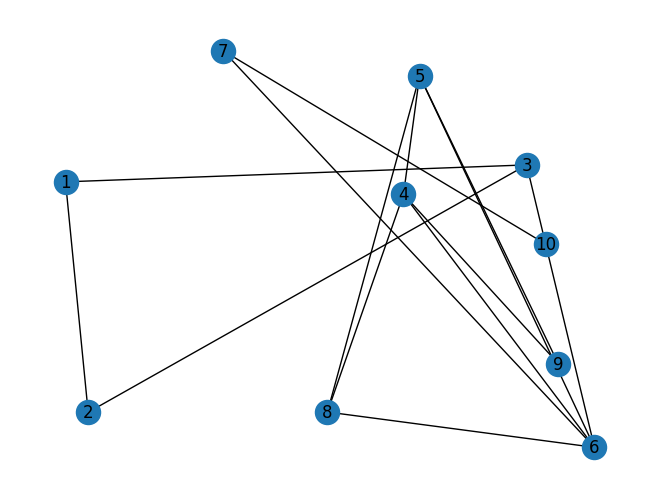

In [7]:
# Creamos la red
redNoDirigida = nx.Graph()

# Insertamos los nodos
redNoDirigida.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
redNoDirigida.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 6), (6, 7), (6, 4), (6, 5), (6, 8), (7, 10), (4, 5), (4, 8), (4, 9), (5, 8), (5, 9)])

# Calculamos el número de nodos y enlaces
num_nodos = redNoDirigida.number_of_nodes()
num_enlaces = redNoDirigida.number_of_edges()
print("Número de nodos:", num_nodos)
print("Número de enlaces:", num_enlaces)

# Añadimos los atributos a la red
nx.set_edge_attributes(redNoDirigida, values= "no-dirigida", name= "red")

# Visualizar la red
pos = nx.random_layout(redNoDirigida)
nx.draw(redNoDirigida, pos, with_labels=True)
plt.show()

Vecinos de U: [6, 4, 5]


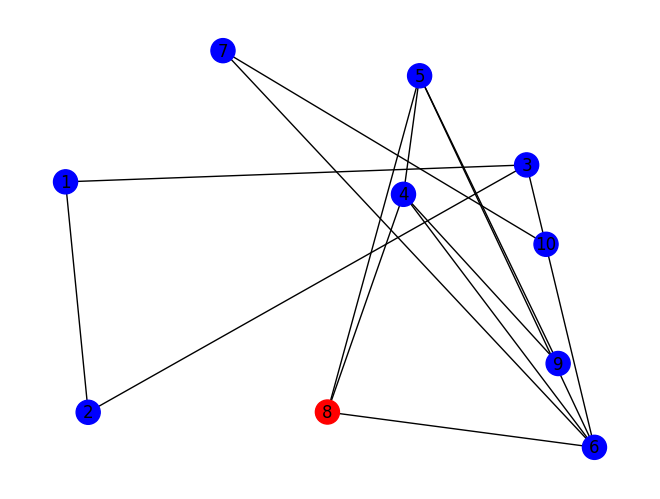

In [8]:
# Calcular los vecinos del nodo U
U = 8
vecinos_U = list(redNoDirigida.neighbors(U))
print("Vecinos de U:", vecinos_U)

# Cambiamos el color del nodo U y sus enlaces en la visualización
color_map = ['blue' if node != U else 'red' for node in redNoDirigida.nodes()]
nx.draw(redNoDirigida, pos, with_labels=True, node_color=color_map)
plt.show()

### 2. Comprensión de listas con Networkx


In [9]:
# Calculamos los grados de los nodos y ordenamos de mayor a menor
grados = dict(redNoDirigida.degree())
grados_ordenados = sorted(grados.values(), reverse=True)
print("Lista de grados de nodos ordenada de mayor a menor:", grados_ordenados)

# Mostramos la lista de tuplas (nodo, grado) ordenada de mayor a menor por el grado
tuplas_ordenadas = sorted(grados.items(), key=lambda x: x[1], reverse=True)
print("Lista de tuplas (nodo, grado) ordenada de mayor a menor por el grado:", tuplas_ordenadas)

# Mostramos los 3 nodos con mayor grado
mayores_grados = sorted(grados, key=grados.get, reverse=True)[:3] # [:3] evita hacer un bucle for o while acortando el array ordenado a los 3 primeros
print("Los 3 nodos con mayor grado:", mayores_grados)

Lista de grados de nodos ordenada de mayor a menor: [5, 4, 4, 3, 3, 2, 2, 2, 2, 1]
Lista de tuplas (nodo, grado) ordenada de mayor a menor por el grado: [(6, 5), (4, 4), (5, 4), (3, 3), (8, 3), (1, 2), (2, 2), (7, 2), (9, 2), (10, 1)]
Los 3 nodos con mayor grado: [6, 4, 5]


### 3. Trabajar con atributos de una red


Enlaces con peso mayor que el umbral W: [(1, 2, 74), (1, 3, 63), (4, 6, 78), (4, 5, 80), (5, 8, 63), (5, 9, 79), (6, 8, 88)]
Distribución de pesos ordenada de menor a mayor: [12, 21, 36, 37, 40, 43, 44, 63, 74, 78, 79, 80, 88]


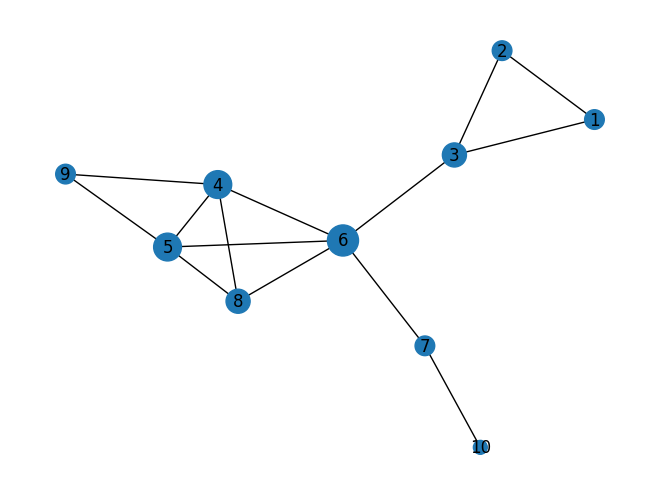

In [10]:
# Añadimos atributo 'peso' a cada enlace
for u, v in redNoDirigida.edges():
    redNoDirigida[u][v]['peso'] = random.randint(1, 100)
    
# Mostramos todos los enlaces con peso mayor que un umbral W
umbral_W = 50
enlaces_con_peso_mayor_que_W = [(u, v, redNoDirigida[u][v]['peso']) for u, v in redNoDirigida.edges() if redNoDirigida[u][v]['peso'] > umbral_W]
print("Enlaces con peso mayor que el umbral W:", enlaces_con_peso_mayor_que_W)

# Mostramos la distribución de pesos ordenada de menor a mayor
pesos_ordenados = sorted(set([redNoDirigida[u][v]['peso'] for u, v in redNoDirigida.edges()]))
print("Distribución de pesos ordenada de menor a mayor:", pesos_ordenados)

# Visualizamos la red utilizando un layout kamada_kawai, con las etiquetas de los nodos y tamaño proporcional a su grado
node_size = [100 * len(list(redNoDirigida.neighbors(node))) for node in redNoDirigida.nodes()] #hay que usar list para que me pase de un iterable a una lista
pos = nx.kamada_kawai_layout(redNoDirigida)
nx.draw(redNoDirigida, pos, with_labels=True, node_size=node_size)
plt.show()

### 4. Importar una red

Número de nodos: 34
Número de enlaces: 78


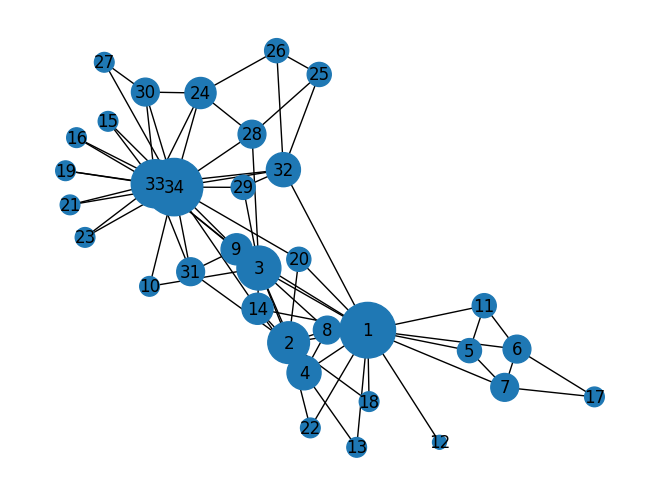

In [12]:
# Cargamos la red social desde el archivo GML
redImportada = nx.read_gml('./karate.gml', label ='id')

# Calculamos el número de nodos y enlaces
num_nodos = len(redImportada.nodes)
num_enlaces = len(redImportada.edges)
print("Número de nodos:", num_nodos)
print("Número de enlaces:", num_enlaces)

# Visualizamos la red con el tamaño de los nodos proporcional a su grado
grados = dict(redImportada.degree())
node_size = [100 * grados[node] for node in redImportada.nodes]
nx.draw(redImportada, with_labels=True, node_size=node_size)
plt.show()


### 5. Función amigos mutuos

In [14]:
def amigos_mutuos(Grafo, nodo1, nodo2):
    # Vecinos de cada nodo
    vecinos_node1 = set(Grafo.neighbors(nodo1))
    vecinos_node2 = set(Grafo.neighbors(nodo2))
    
    # Intersección de los conjuntos de vecinos para obtener los amigos mutuos
    amigos_comunes = vecinos_node1.intersection(vecinos_node2)
    
    return list(amigos_comunes) # Combertimos a lista

nodo1 = 1
nodo2 = 34

amigosMutuos = amigos_mutuos(redImportada, nodo1, nodo2)
print ('Los Amigos Mutuos de la red importada en los nodos {} y {} son: '.format(nodo1, nodo2) + str(amigosMutuos))

Los Amigos Mutuos de la red importada en los nodos 1 y 34 son: [32, 9, 20, 14]
